In [2]:
import pandas as pd
import matplotlib.pyplot as plt

#importando dados e limpando valores nulos
df = pd.read_csv("air_conditioner_prices_dataset.csv").dropna()
df

,Brand,Capacity (BTUs),EER/SEER,Type,Features,Location,Age (years),Price ($)
0,Brand A,18000,14.6,Portable,Quiet,India,3,239
1,Brand C,8000,12.3,Portable,WiFi,USA,4,348
2,Brand B,15000,12.4,Window,WiFi,Europe,4,325
3,Brand C,18000,15.6,Split,Standard,Australia,4,480
4,Brand C,12000,17.5,Portable,"Inverter Technology, WiFi",Australia,2,881
...,...,...,...,...,...,...,...,...
195,Brand B,8000,19.7,Portable,"WiFi, Inverter Technology",Australia,2,975
196,Brand B,8000,14.4,Portable,Compact,Australia,3,276
197,Brand C,8000,14.9,Window,"WiFi, Inverter Technology",Australia,2,762
198,Brand A,10000,19.3,Window,"Standard, WiFi",Australia,2,723


In [31]:
# informações sobre o DataFrame
df.info()

# primeiras linhas do DataFrame
df.head()

# Descrição estatística das variáveis numéricas
df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Brand            200 non-null    object 
 1   Capacity (BTUs)  200 non-null    int64  
 2   EER/SEER         200 non-null    float64
 3   Type             200 non-null    object 
 4   Features         200 non-null    object 
 5   Location         200 non-null    object 
 6   Age (years)      200 non-null    int64  
 7   Price ($)        200 non-null    int64  
dtypes: float64(1), int64(3), object(4)
memory usage: 12.6+ KB


,Capacity (BTUs),EER/SEER,Age (years),Price ($)
count,200.000000,200.000000,200.000000,200.000000
mean,12305.000000,16.112500,2.360000,604.850000
std,3507.633456,2.386687,1.129949,222.109931
min,8000.000000,12.000000,1.000000,203.000000
25%,10000.000000,13.850000,1.000000,435.500000
50%,12000.000000,16.400000,2.000000,592.500000
75%,15000.000000,18.050000,3.000000,802.500000
max,18000.000000,20.000000,4.000000,998.000000


In [7]:
# analisando as marcas que mais vendem (Brand)
vendas_marcas = df['Brand'].value_counts()
vendas_marcas

Brand
Brand A    71
Brand C    67
Brand B    62
Name: count, dtype: int64

<Axes: xlabel='Brand'>

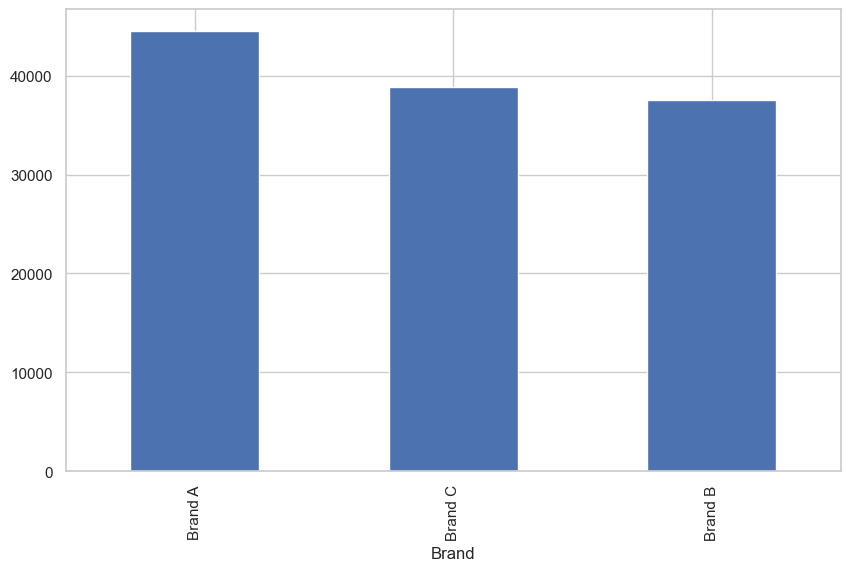

In [35]:
# analisando vendas por marca
marca_vendas = df.groupby('Brand')['Price ($)'].sum().sort_values(ascending=False)

# principais marcas em gráfico de barras
marca_vendas.plot(x='Brand', y='Total Sales', kind='bar', figsize=(10, 6))


<Axes: xlabel='Brand'>

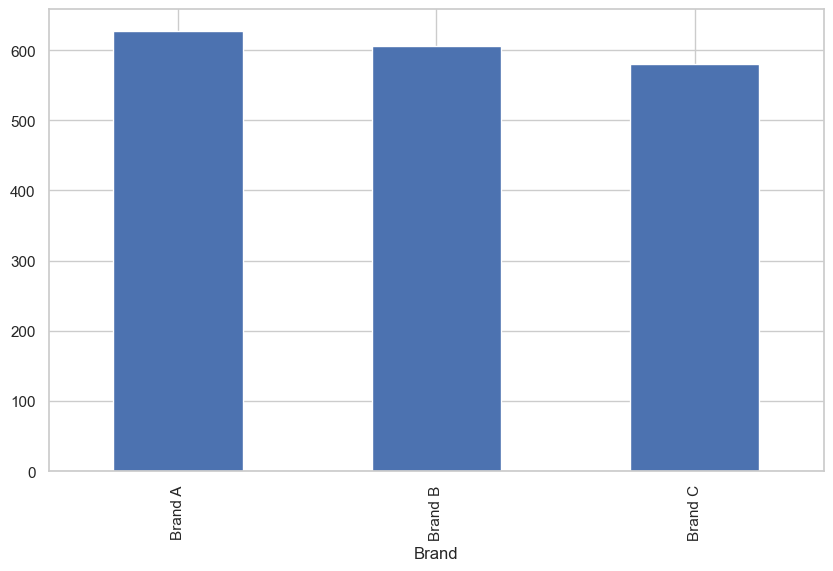

In [50]:
# lucro médio por marca
marca_lucro = df.groupby('Brand')['Price ($)'].mean()


# gráfico de barras
marca_lucro.plot(x='Brand', y='Average Profit', kind='bar', figsize=(10, 6))


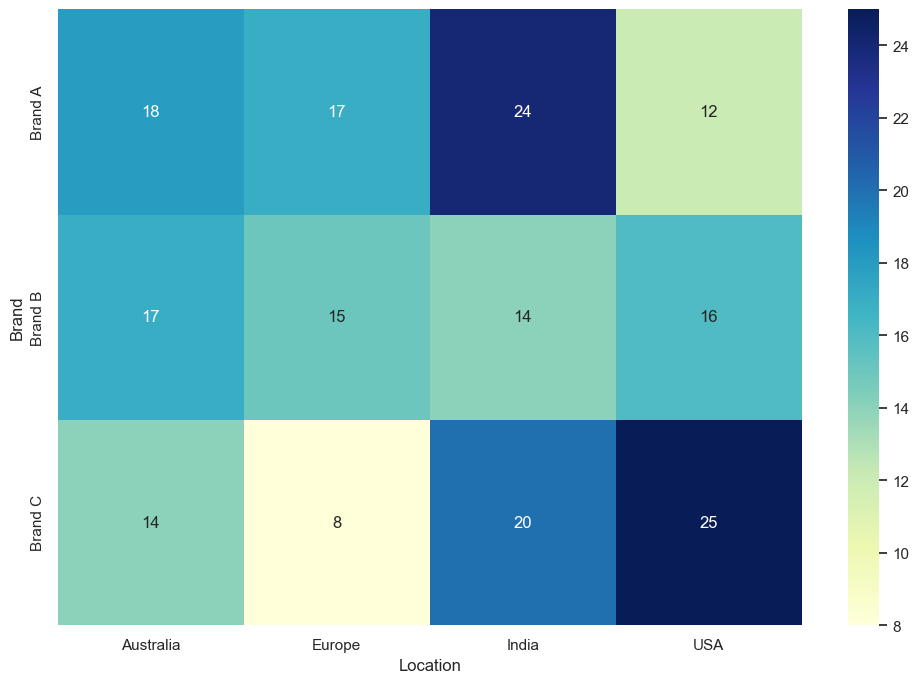

In [39]:
# contagem de vendas por marca e região
marca_regiao = df.groupby(['Brand', 'Location']).size().unstack(fill_value=0)

# Mapa de calor das vendas
plt.figure(figsize=(12, 8))
sns.heatmap(marca_regiao, annot=True, fmt="d", cmap="YlGnBu")
plt.show()

<Axes: ylabel='Total Sales'>

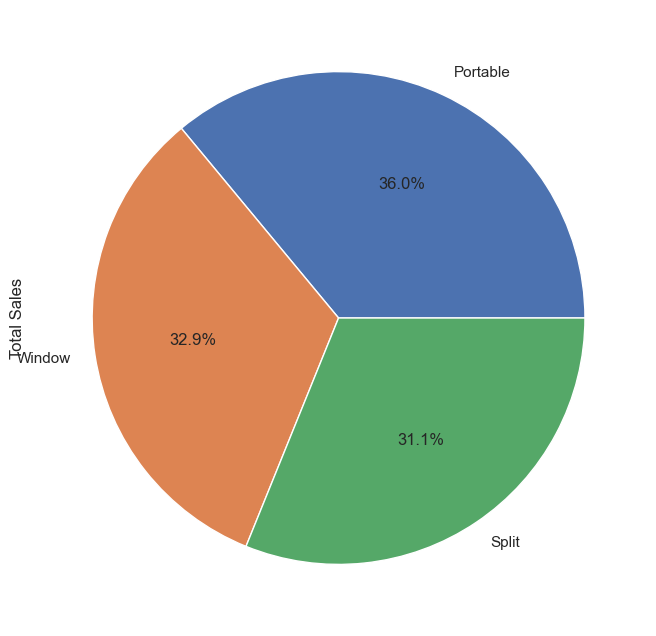

In [40]:
# ordenando vendas por tipo
tipo_vendas = df.groupby('Type')['Price ($)'].sum().sort_values(ascending=False).reset_index(name='Total Sales')

# gráfico de torta
tipo_vendas['Total Sales'].plot(kind='pie', labels=tipo_vendas['Type'], autopct='%1.1f%%', figsize=(8, 8))


       Type  Average Profit
0  Portable      596.808219
1     Split      597.698413
2    Window      621.062500


<Axes: xlabel='Type'>

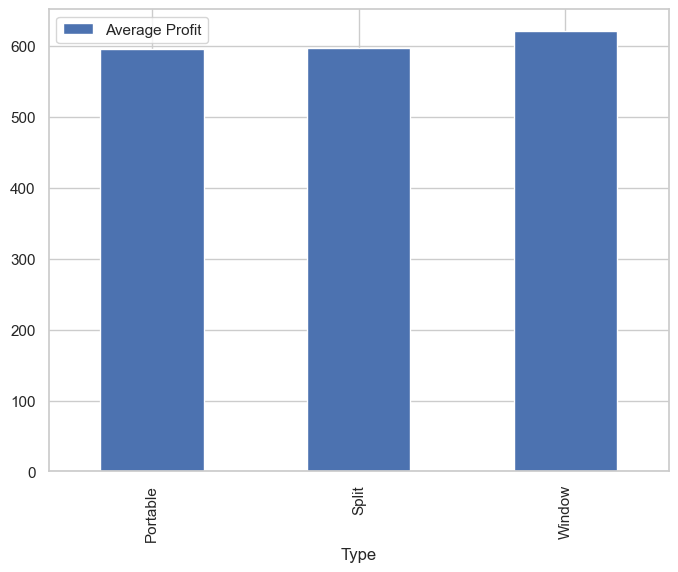

In [52]:
# iniciando a analise de lucratividade média por tipo de ar condicionado
tipo_lucro = df.groupby('Type')['Price ($)'].mean().reset_index(name='Average Profit')
print(tipo_lucro)
# mostrando os tipos de ar condicionado mais lucrativos em um gráfico de barras
tipo_lucro.plot(x='Type', y='Average Profit', kind='bar', figsize=(8, 6))


                 Total Sales
Capacity (BTUs)             
(5000, 10000]             88
(10000, 15000]            76
(15000, 20000]            36


C:\Users\Natan\AppData\Local\Temp\ipykernel_1092\192045199.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  capacidade_vendas = df.groupby(pd.cut(df['Capacity (BTUs)'], bins=[ 5000, 10000, 15000, 20000])).size().to_frame(name='Total Sales')


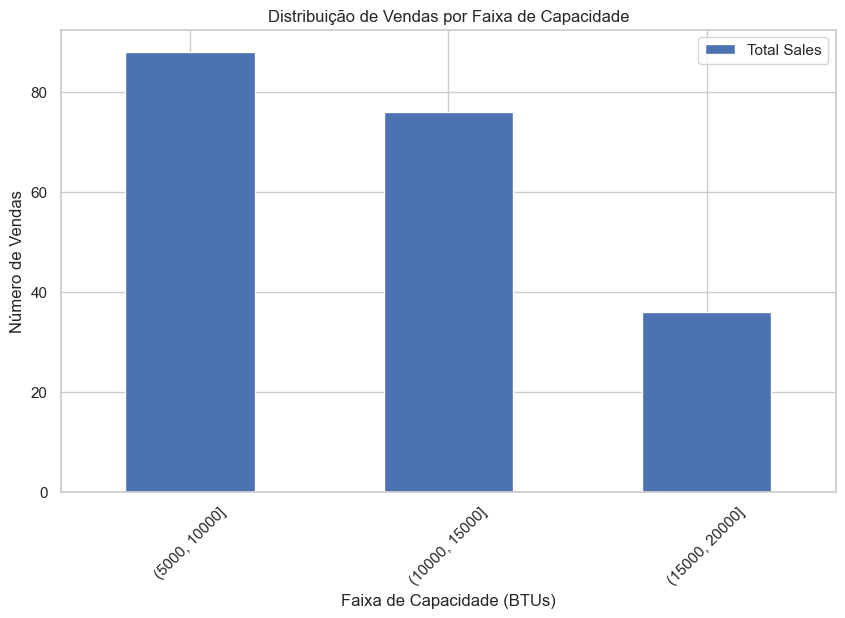

In [53]:
# agrupando vendas por faixas de capacidade
capacidade_vendas = df.groupby(pd.cut(df['Capacity (BTUs)'], bins=[ 5000, 10000, 15000, 20000])).size().to_frame(name='Total Sales')
print(capacidade_vendas)
# gráfico de barras para mostrar as vendas por capacidade
capacidade_vendas.plot(kind='bar', figsize=(10, 6))
plt.xlabel('Faixa de Capacidade (BTUs)')
plt.ylabel('Número de Vendas')
plt.title('Distribuição de Vendas por Faixa de Capacidade')
plt.xticks(rotation=45)
plt.show()